In [1]:
import logging # 引入logging模块
import os
import os.path
import time
# 第一步，创建一个logger
logger = logging.getLogger()
logger.setLevel(logging.INFO) # Log等级总开关
# 第二步，创建一个handler，用于写入日志文件
rq = time.strftime('%Y%m%d%H%M', time.localtime(time.time()))
# log_path = os.path.dirname(os.getcwd()) + '/Logs/'
log_path = os.getcwd() + '/Logs/'
# print(log_path)
log_name = log_path + rq + '.log'
logfile = log_name
# os.makedirs(log_path)
fh = logging.FileHandler(logfile)
fh.setLevel(logging.DEBUG) # 输出到file的log等级的开关
# 第三步，定义handler的输出格式
formatter = logging.Formatter("%(asctime)s - %(filename)s[line:%(lineno)d] - %(levelname)s: %(message)s")
fh.setFormatter(formatter)
# 第四步，将logger添加到handler里面
logger.addHandler(fh)
# 日志
logger.debug('this is a logger debug message')
logger.info('this is a logger info message')
logger.warning('this is a logger warning message')
logger.error('this is a logger error message')
logger.critical('this is a logger critical message')

In [1]:
import torch
from torch import nn
class A(nn.Module):
    def __init__(self, c):
        super(A, self).__init__()
        self.c = c
        print('haha')
        print(self.c)
    
    def forward(self,):
        print('lala')
        return self.c + 1

class B(A):

    def __init__(self, e):
        super(B, self).__init__(c=e)
        self.c += 1
        print('yoyo')
    
    # def forward(self):
    #     print('yoyo2')

class C(nn.Module):
    def __init__(self):
        super(C, self).__init__()
        self.backbone = A()
        print('sasa')

    def forward(self):
        print('gaga')
        return self.backbone(1)

b = B(2)
b()

haha
2
yoyo
lala


4

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
a = torch.ones((3, 256, 126, 125))
b = F.max_pool2d(a, kernel_size=[1, a.size(3)])
a.shape, b.shape

(torch.Size([3, 256, 126, 125]), torch.Size([3, 256, 126, 1]))

In [1]:
import etw_pytorch_utils as pt_utils
import torch
import torch.nn as nn
from pointnet2.utils.pointnet2_modules import PointnetSAModule
# A = (
#                 pt_utils.Seq(256)
#                 .conv1d(1, bn=True, activation=None))
A = nn.Linear(256, 3)
a = torch.ones((3, 256, 1024))
# b = A(a).squeeze(1)
# b = b.sigmoid()
b.shape

NameError: name 'b' is not defined

In [16]:
from tqdm import tqdm
import time
for i in tqdm(range(50), ascii=True, ncols=100, position=0, desc='yada'):
    # tqdm.write('hoho')
    time.sleep(0.1)
    # pass

yada: 100%|#########################################################| 50/50 [00:05<00:00,  9.78it/s]


In [1]:
from Dataset import SiameseTrain
import torch
from tqdm import tqdm
valid_data = SiameseTrain(
            input_size=1024,
            path='/media/zhouxiaoyu/本地磁盘/RUNNING/data/traning',
            split='Valid',
            category_name='Car',
            offset_BB=0,
            scale_BB=1.25)
# train_dataloader = torch.utils.data.DataLoader(
#     train_data,
#     batch_size=8,
#     shuffle=True,
#     num_workers=0,
#     pin_memory=True)
# for i, data in enumerate(tqdm(train_dataloader, ascii=True, position=0, desc='yada')):
#     if i == 5:
#         break
#     else:
#         continue

annotations of a certain instance: 100%|██████████| 18/18 [00:01<00:00, 11.46it/s]


In [8]:
# type(train_data.list_of_anno[0])
import pandas
import json 
for idx, anno in enumerate(train_data.list_of_anno):
    anno.to_json(path_or_buf='train_data.list_of_anno[{}].json'.format(idx))

In [2]:
import json
import numpy as np 
import pandas as pd 
with open('/media/zhouxiaoyu/本地磁盘/RUNNING/data/train_data/train_data.list_of_anno[0].json','r') as load_f:
    b = json.load(load_f)
# np.array(b).tolist()['0']
sa = pd.Series(np.array(b).tolist(), name='0', dtype=object)
# sa["relative_idx"] == train_data.list_of_anno[0]["relative_idx"]
type(sa)

pandas.core.series.Series

In [5]:
import numpy as np
list_of_BBs = np.array(valid_data.list_of_PCs)
np.save('valid_data.list_of_PCs.npy', list_of_BBs)

In [6]:
import numpy as np 
c = np.load('/media/zhouxiaoyu/本地磁盘/RUNNING/P2B/valid_data.list_of_PCs.npy', allow_pickle=True).tolist()
len(c) == len(valid_data.list_of_PCs)

True

In [31]:
# for idx, d in enumerate(data):
    # print(data[idx].shape)
# from train_tracking import aux_loss
import torch 
from mmdet.core.loss.losses import weighted_smoothl1, weighted_sigmoid_focal_loss
label_point_set, label_cla, label_reg, object_point_set, sample_seg_label, sample_seg_offset = data
rpn_cls_target = sample_seg_label.float()
pos = (sample_seg_label > 0).float()
neg = (sample_seg_label == 0).float()
# pos.shape, neg.shape
pos_normalizer = pos.sum()

pos_normalizer = torch.clamp(pos_normalizer, min=1.0)
# pos_normalizer
cls_weights = pos + neg
cls_weights = cls_weights / pos_normalizer
# cls_weights
reg_weights = pos
reg_weights = reg_weights / pos_normalizer
# rpn_cls_target.view(-1).shape
point_cls = torch.randn((8, 1024))
point_reg = torch.randn((8, 3, 1024))
# aux_loss_cls = weighted_sigmoid_focal_loss(point_cls, rpn_cls_target, weight=cls_weights, avg_factor=1.)
# aux_loss_cls

# aux_loss_reg = weighted_smoothl1(point_reg.transpose(1, 2), sample_seg_offset, beta=1 / 9., weight=reg_weights[..., None], avg_factor=1.)
# aux_loss_reg


8

In [11]:
import torch as t 
a = t.randn(2, 3, 2, 2)
# mean = a.mean([3])
b = a[None, ..., None, None]
c = a[..., None, None, None]
a.shape, b.shape, c.shape
# a, mean 

(torch.Size([2, 3, 2, 2]),
 torch.Size([1, 2, 3, 2, 2, 1, 1]),
 torch.Size([2, 3, 2, 2, 1, 1, 1]))

In [1]:
import torch
import torch.nn as nn
import torch.nn.parallel  # 多GPU情况下分布式训练
# import torch.backends.cudnn as cudnn  # 貌似没有用到
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler  # 可用来调整学习率
cc = torch.nn.Conv2d(10,10,3)
optimizer = optim.Adam(cc.parameters(), lr=0.001, betas=(0.5, 0.999), eps=1e-06)
scheduler = lr_scheduler.StepLR(optimizer, step_size=12, gamma=0.2)
scheduler.last_epoch

0

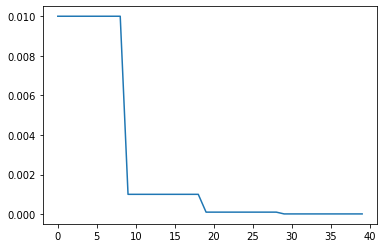

In [2]:
import torch
import numpy as np 
import torch.nn as nn
import torch.nn.parallel  # 多GPU情况下分布式训练
# import torch.backends.cudnn as cudnn  # 貌似没有用到
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler  # 可用来调整学习率
import matplotlib.pyplot as plt 
t = torch.tensor([0.0], requires_grad=True)
optim = torch.optim.SGD([t], lr=0.01)
scheduler = lr_scheduler.MultiStepLR(optim, milestones=[10, 20, 30])
lrs = []
for e in range(40):
    optim.step()
    scheduler.step()
    lrs.append((e, optim.param_groups[0]['lr']))

lrs = np.array(lrs)
plt.plot(lrs[:, 0], lrs[:, 1])

In [1]:
import torch 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pylab as pylab  # 这是matplotlib面向对象打印库的程序接口。
import open3d as o3d 
import numpy as np 
# fig = plt.figure(figsize=(15, 10), facecolor="white")
# Create axis in 3D
# ax = fig.gca(projection='3d')
label_point_set, label_cla, label_reg, object_point_set, sample_seg_label, sample_seg_offset = data
# Scatter plot the cropped point cloud
label_point_set = np.array(label_point_set)
view_PC = label_point_set[6].transpose(0, 1)
# ratio = 1
# ax.scatter(
#     view_PC[0, ::ratio],  # ::ratio表示从开头到结尾以ratio为步进，依次读出数据
#     view_PC[1, ::ratio],
#     view_PC[2, ::ratio],
#     s=3,
#     c=view_PC[2, ::ratio])
# view_BB = 
# ax.plot(
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(view_PC)
o3d.visualization.draw_geometries([pcd])
# )

NameError: name 'data' is not defined